In [26]:
import pandas as pd
import matplotlib.pyplot as plt

In [27]:
df = pd.read_csv("/content/fibreshot_clean (1).csv")

In [28]:
df.head()

,fibreshottime,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,30:07.9,0.840229,0.887397,0.809196,0.253604,0.181111,0.303052,0.326150,0.398227,1.864811,...,0.267354,0.262241,0.277209,0.322208,0.202257,0.230640,0.243941,0.278307,0.266927,0.187142
1,30:08.4,13.201060,0.987356,1.680790,0.608987,0.313534,0.364520,0.468044,1.348178,1.738608,...,0.574497,0.401139,0.514664,1.017531,0.452417,0.445572,0.747572,0.599552,0.459695,0.575436
2,30:08.7,15.846101,0.477794,0.782222,0.261701,0.250232,0.217795,0.331494,0.601364,0.775977,...,0.311389,0.255630,0.483783,0.412810,0.229129,0.260424,0.331060,0.261470,0.206276,0.307389
3,30:09.1,8.801699,0.304165,0.265573,0.300158,0.250317,0.256215,0.271231,0.197571,0.586284,...,0.293426,0.231230,0.304196,0.330548,0.148427,0.200270,0.214486,0.187417,0.166375,0.223437
4,31:04.7,0.875403,1.213887,0.522335,0.128527,1.213887,1.213887,1.213887,1.213887,1.213887,...,0.229811,0.104014,0.307832,0.197380,1.065338,0.150758,0.231836,0.251376,0.183446,0.143143


In [29]:
def parse_time_to_seconds(t):
    parts = str(t).split(':')

    if len(parts) == 2:          # MM:SS.f
        minutes, seconds = parts
        total_seconds = int(minutes) * 60 + float(seconds)

    elif len(parts) == 3:        # HH:MM:SS.f
        hours, minutes, seconds = parts
        total_seconds = (
            int(hours) * 3600 +
            int(minutes) * 60 +
            float(seconds)
        )

    else:
        raise ValueError(f"Unsupported time format: {t}")

    return total_seconds

In [30]:
df['fibreshottime_seconds'] = df['fibreshottime'].apply(parse_time_to_seconds)

In [31]:
df['fibreshottime'] = pd.to_timedelta(df['fibreshottime_seconds'], unit='s')

In [32]:
df.drop(columns=['fibreshottime_seconds'], inplace=True)

In [33]:
df.set_index('fibreshottime', inplace=True)
df.sort_index(inplace=True)

In [34]:
df = df.ffill().bfill()

In [35]:
print("Shape:", df.shape)
print("Missing values:", df.isnull().sum().sum())

Shape: (1000, 1023)
Missing values: 0


In [36]:
df.head()

,1,2,3,4,5,6,7,8,9,10,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
fibreshottime,,,,,,,,,,,,,,,,,,,,,
0 days 00:00:17,0.929942,0.845575,0.895007,0.433289,0.316650,0.182215,1.809495,0.544876,1.043514,1.398876,...,0.178253,0.123534,0.214175,0.336752,0.291852,0.218723,0.615815,0.429049,0.213189,0.192318
0 days 00:00:17.300000,0.524966,0.390312,0.406207,0.826752,0.097790,0.132934,0.606307,0.686648,0.653623,0.404955,...,0.137662,0.177609,0.119784,0.173381,0.291947,0.260762,0.210040,0.157172,0.100164,0.222368
0 days 00:00:17.600000,0.504710,0.389234,0.225703,0.689664,0.145835,0.108473,0.220865,0.499362,0.382189,0.123290,...,0.106952,0.101086,0.166732,0.206197,0.131747,0.118736,0.142776,0.089185,0.152599,0.097231
0 days 00:00:17.800000,0.338353,0.187334,0.259141,0.432223,0.175838,0.089414,0.175046,0.338719,0.275266,0.092520,...,0.097580,0.155068,0.082931,0.113564,0.091651,0.089024,0.080385,0.080711,0.109050,0.159889
0 days 00:00:18.100000,0.195765,0.212972,0.194428,0.372200,0.141107,0.064251,0.207518,0.346306,0.327119,0.092232,...,0.071593,0.105331,0.047613,0.144317,0.065661,0.064133,0.150272,0.169636,0.109987,0.117828


In [37]:
sensor_cols = df.columns[:3]

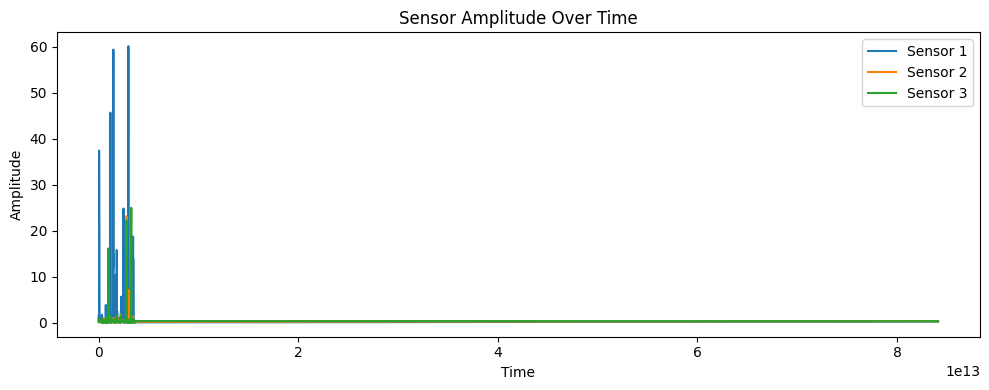

In [38]:
plt.figure(figsize=(10, 4))
for col in sensor_cols:
    plt.plot(df.index, df[col], label=f"Sensor {col}")

plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.title("Sensor Amplitude Over Time")
plt.legend()
plt.tight_layout()
plt.show()

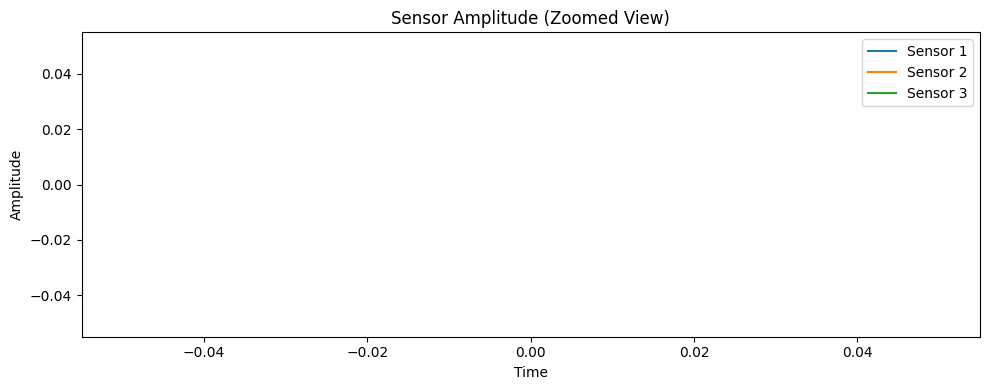

In [39]:
sensor_cols = df.columns[:3]
df_zoom = df.loc[df.index <= pd.to_timedelta(0.5, unit="s")]

plt.figure(figsize=(10, 4))
for col in sensor_cols:
    plt.plot(df_zoom.index, df_zoom[col], label=f"Sensor {col}")

plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.title("Sensor Amplitude (Zoomed View)")
plt.legend()
plt.tight_layout()
plt.show()

In [40]:
df.index.min(), df.index.max()


(Timedelta('0 days 00:00:17'), Timedelta('0 days 23:21:42'))

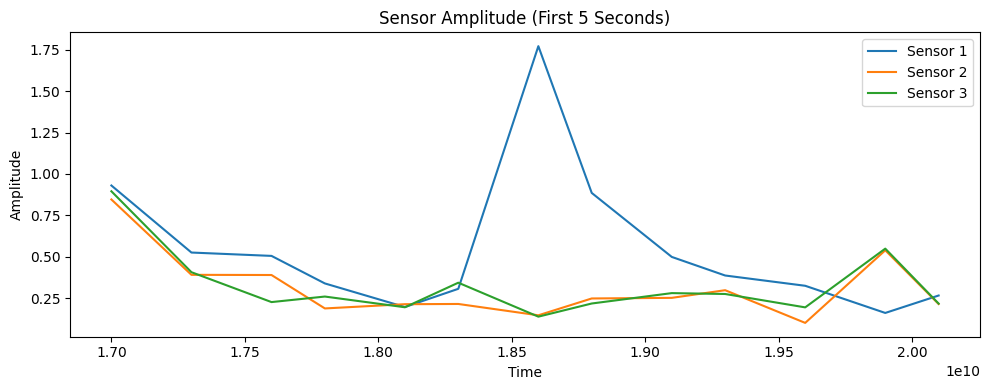

In [41]:
start_time = df.index.min()
end_time = start_time + pd.to_timedelta(5, unit="s")  # first 5 seconds

df_zoom = df.loc[(df.index >= start_time) & (df.index <= end_time)]

plt.figure(figsize=(10, 4))
for col in sensor_cols:
    plt.plot(df_zoom.index, df_zoom[col], label=f"Sensor {col}")

plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.title("Sensor Amplitude (First 5 Seconds)")
plt.legend()
plt.tight_layout()
plt.show()

In [42]:
import pandas as pd

# take first 5 seconds only
start = df.index.min()
end = start + pd.to_timedelta(5, unit="s")

df_small = df.loc[(df.index >= start) & (df.index <= end)]


In [43]:
df_upsampled = (
    df_small
    .resample("10ms")
    .mean()
    .interpolate(method="linear")
)


In [44]:
print(df_small.shape)
print(df_upsampled.shape)


(13, 1023)
(311, 1023)


In [45]:
sensor_means = df_upsampled.mean()


selected_sensors = sensor_means[sensor_means > 0.5]

print("Number of selected sensors:", selected_sensors.shape[0])
selected_sensors.head()


Number of selected sensors: 7


,0
1,0.542859
100,1.125272
113,0.525085
667,0.559173
715,0.582528


In [46]:
labels = sensor_means.apply(lambda x: 'anomaly' if x > 0.5 else 'noise')


df_final = df_upsampled.T

df_final['label'] = labels


print(df_final['label'].value_counts())

label
noise      1016
anomaly       7
Name: count, dtype: int64


Model Accuracy: 0.9902439024390244

Detailed Report:
               precision    recall  f1-score   support

     anomaly       0.00      0.00      0.00         1
       noise       1.00      1.00      1.00       204

    accuracy                           0.99       205
   macro avg       0.50      0.50      0.50       205
weighted avg       0.99      0.99      0.99       205



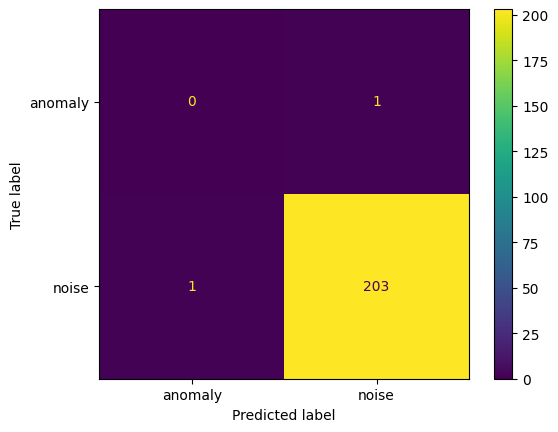

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay, classification_report

x = df_final.drop(columns=['label'])
y = df_final['label']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model = RandomForestClassifier()
model.fit(x_train, y_train)

print("Model Accuracy:", model.score(x_test, y_test))
print("\nDetailed Report:\n", classification_report(y_test, model.predict(x_test)))

ConfusionMatrixDisplay.from_estimator(model, x_test, y_test)